<h2>Priyanshu Chaurasiya</h2>


In [ ]:
### upload the cctv images files
from google.colab import files
uploaded = files.upload()

Saving cctv1.JPG to cctv1.JPG
Saving cctv2.JPG to cctv2.JPG
Saving cctv3.JPG to cctv3.JPG
Saving cctv4.JPG to cctv4.JPG


Enter image number:2


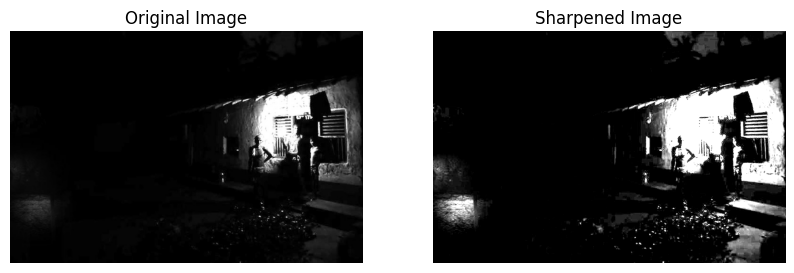

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_cctv_img(image_path):
    # Load the image
    image = cv2.imread(image_path, 0)  # Read as grayscale image

    # Apply adaptive histogram equalization to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6, 6))
    enhanced_image = clahe.apply(image)

    # Apply bilateral filter to reduce noise while preserving edges
    filtered_image = cv2.bilateralFilter(enhanced_image, 10, 55, 55)

    # Increase brightness and contrast
    alpha = 1.3 # Contrast control (1.0-3.0)
    beta = 60 # Brightness control (0-100)
    enhanced_image = cv2.convertScaleAbs(filtered_image, alpha=alpha, beta=beta)
    unsharp_image = cv2.addWeighted(image, 7, enhanced_image, -0.5, 0)

    return unsharp_image

# Example usage
input_image_path = "cctv1.JPG"
output_image = enhance_cctv_img(input_image_path)

p=int(input("Enter image number:"))
if(p==1):
  input_image_path = "cctv1.JPG"
elif(p==2):
  input_image_path = "cctv2.JPG"
elif(p==3):
  input_image_path = "cctv3.JPG"
elif(p==4):
  input_image_path = "cctv4.JPG"



# Display the original(input) and sharpened(output Image)
output_image = enhance_cctv_img(input_image_path)
cv2.imwrite('sharpened_image.jpg', output_image)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(output_image, cmap='gray')
ax2.set_title('Sharpened Image')
ax2.axis('off')
plt.show()